In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import plotly.express as px

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)


print("dimensions de X : {}".format(X.shape))
print("dimensions de y : {}".format(y.shape))

fig = px.scatter(x=X[:,0], y = X[:,1], color=y)
fig.show()

y = y.reshape((y.shape[0], 1))


dimensions de X : (100, 2)
dimensions de y : (100,)


In [3]:
# Initialisation
# On initialise les paramètres W et b

def init(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W,b

W, b = init(X)

In [4]:
# Modèle
# On crée le modèle des neurones artificiels

def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/(1+np.exp(-Z))
    return A

A = model(X, W, b)
print(A.shape)

(100, 1)


In [5]:
# Cost
# On évalue le coût de notre modèle

def log_loss(A, y):
    m = len(y)
    epsilon = 1e-15
    return 1/m * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A + epsilon))

log_loss(A,y)


0.9698365905335229

In [6]:
# Gradients
# Minimiser la fonction coût

def gradients(A, X, y):
    m = len(y)
    dW = 1/m * np.dot(X.T, A-y)
    db = 1/m * np.sum(A-y)
    return (dW, db)

dW, db = gradients(A, X, y)
print(dW.shape)
print(db)

(2, 1)
-0.10605258952739348


In [7]:
# Update
# On modifie les paramètres pour tendre vers une stabilité

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W, b

In [8]:
# Threshold

def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

[[0.14811737]
 [0.22053668]
 [0.18655475]
 [0.2124325 ]
 [0.17225932]
 [0.18409451]
 [0.17622285]
 [0.15007134]
 [0.18437118]
 [0.2173351 ]
 [0.17875794]
 [0.20407461]
 [0.16181937]
 [0.1889574 ]
 [0.19029607]
 [0.14874037]
 [0.18831858]
 [0.18968486]
 [0.22397838]
 [0.20186238]
 [0.1686459 ]
 [0.17925757]
 [0.1897957 ]
 [0.18376786]
 [0.18812039]
 [0.17224911]
 [0.21796122]
 [0.15675636]
 [0.16476741]
 [0.17545083]
 [0.20123304]
 [0.17076987]
 [0.21365973]
 [0.20081929]
 [0.18144808]
 [0.15910147]
 [0.2062108 ]
 [0.17708538]
 [0.17028991]
 [0.21592618]
 [0.2085038 ]
 [0.13899347]
 [0.18102992]
 [0.17591813]
 [0.19250097]
 [0.18501249]
 [0.20936924]
 [0.2176088 ]
 [0.19641853]
 [0.16843678]
 [0.20436524]
 [0.21443843]
 [0.13586734]
 [0.16233022]
 [0.15584332]
 [0.1688259 ]
 [0.16035804]
 [0.2025427 ]
 [0.17638953]
 [0.20282838]
 [0.19794506]
 [0.1621466 ]
 [0.18057755]
 [0.1793629 ]
 [0.15805995]
 [0.18158436]
 [0.19550473]
 [0.1569679 ]
 [0.17010361]
 [0.16939561]
 [0.17913112]
 [0.21

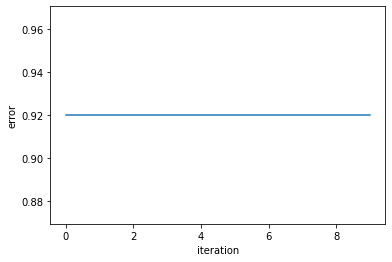

[[-0.03247931]
 [-0.066047  ]] [-1.09945227]


In [10]:
# On créer maintenant notre Percéptron
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # Initialiser les paramètres W et b
    W, b = init(X)

    Loss = []
    acc = []

    for i in range(n_iter):
        A = model(X, W, b)
        if i %10 == 0:

            y_pred = predict(X, W, b)
            acc.append(accuracy_score(y, y_pred))
            Loss.append(log_loss(A, y))
            
    

    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)

    plt.plot(Loss)
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.show()

    return W, b

W, b = artificial_neuron(X, y)
print(W,b)


In [11]:
def cat_Or_dog(y):
    return np.where(y==0, 'cat', 'Dog')

def view(X,y):
    y_name = cat_Or_dog(y)
    plt.figure(figsize=(16,8))
    for i in range(1,10):
        plt.subplot(4,5,i)
        plt.imshow(X[i], cmap='gray')
        plt.title(y_name[i]) 
        plt.tight_layout()
    plt.show()



(1000, 4096) (1000, 1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

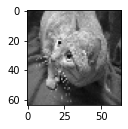

In [12]:
from utilities import *


X_train, y_train, X_test, y_test = load_data()

X_train_reshape = X_train.reshape(X_train.shape[0],-1)/X_train.max()
X_test_reshape = X_train.reshape(X_test.shape[0], -1)/X_train.max()
print(X_train_reshape.shape, y_train.shape)
view(X_train,y_train.reshape(y_train.shape[0], 1))



[[1.00000000e+00]
 [1.15061190e-03]
 [9.99999998e-01]
 [9.99999989e-01]
 [1.00000000e+00]
 [9.99999987e-01]
 [9.99999998e-01]
 [9.94603767e-01]
 [9.11012973e-02]
 [9.99999951e-01]
 [9.99991637e-01]
 [1.00000000e+00]
 [2.68107311e-03]
 [1.00000000e+00]
 [9.99999877e-01]
 [9.98576343e-01]
 [9.99999918e-01]
 [9.99978998e-01]
 [9.94975524e-01]
 [4.57436223e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999998e-01]
 [9.99999996e-01]
 [9.99995508e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.94696263e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999885e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99992728e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.58676300e-13]
 [2.295775

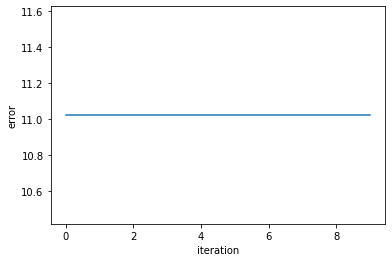

In [ ]:
W, b = artificial_neuron(X_train_reshape, y_train, learning_rate=0.01, n_iter=100)